In [14]:
!pip install seaborn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

sns.set(style="whitegrid")


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11

In [2]:
import pandas as pd

df = pd.read_csv("data/Top-100 Trending Books.csv")
print(df.columns)


Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')


In [4]:
print(df.columns)
df.sample(5)


Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')


,Rank,book title,book price,rating,author,year of publication,genre,url
22,23,A Court of Thorns and Roses (A Court of Thorns...,8.89,4.6,Sarah J. Maas,2015,"Fantasy, Romance, Young Adult, Fiction, New Ad...",amazon.com/Court-Thorns-Roses-Sarah-Maas/dp/16...
62,63,Llama Llama Gives Thanks,5.67,4.7,Anna Dewdney,2017,"Picture Books, Childrens, Holiday, Animals, Ki...",amazon.com/Llama-Gives-Thanks-Anna-Dewdney/dp/...
53,54,Flash Cards: Sight Words,2.88,4.8,Scholastic,2018,"Educational Material, Childrens",amazon.com/Flash-Cards-Scholastic-Teacher-Reso...
19,20,Don't Let the Pigeon Drive the Sleigh!,11.99,4.8,Mo Willems,2023,"Picture Books, Christmas, Holiday, Humor, Chil...",amazon.com/Dont-Let-Pigeon-Drive-Sleigh/dp/145...
11,12,Night (Night),6.26,4.7,Elie Wiesel,1960,Memoir,amazon.com/Night-Elie-Wiesel/dp/0374500010/ref...


In [5]:
# Sort by rating or rank (optional but keeps top books on top)
df = df.sort_values(by="rating", ascending=False).reset_index(drop=True)

# Bestseller label → Top 50 = 1, others = 0
df["is_bestseller"] = df["Rank"].apply(lambda x: 1 if x <= 50 else 0)

# Use title + genre + author as text input
df["text"] = df["book title"] + " " + df["genre"] + " " + df["author"]

df[["text", "is_bestseller"]].head()


,text,is_bestseller
0,"Resurrection Walk (Lincoln Lawyer) Fiction, My...",0
1,"Moo, Baa, La La La! Childrens literature, pict...",0
2,The Very Hungry Caterpillar Nonfiction David B...,1
3,Balloons over Broadway: The True Story of the ...,1
4,"Brown Bear, Brown Bear, What Do You See? Pictu...",1


In [6]:
X = df["text"]
y = df["is_bestseller"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.5


In [11]:
joblib.dump(model, "model.joblib")
joblib.dump(vectorizer, "vectorizer.joblib")

print("✅ Model & Vectorizer saved successfully!")


✅ Model & Vectorizer saved successfully!


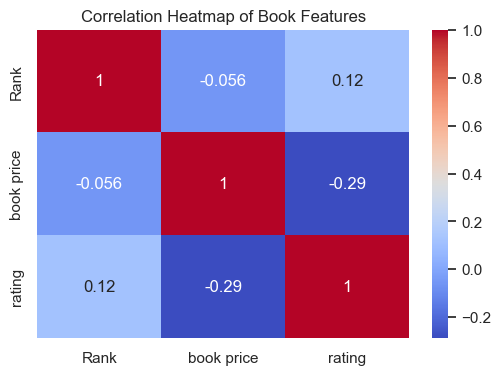

In [15]:
# Convert price/rating/rank to numeric if needed
df["book price"] = pd.to_numeric(df["book price"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["Rank"] = pd.to_numeric(df["Rank"], errors="coerce")

# Pick only numeric columns
numeric_df = df[["Rank", "book price", "rating"]]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Book Features")
plt.show()


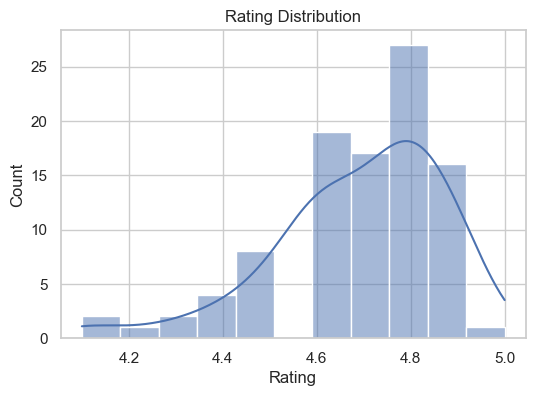

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["rating"], kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


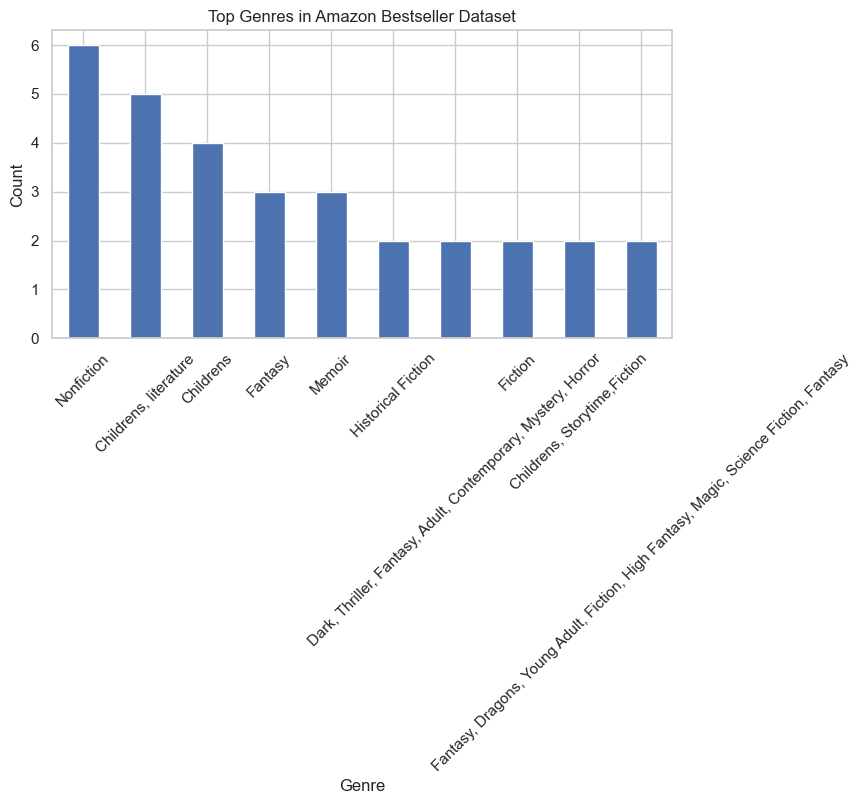

In [17]:
plt.figure(figsize=(8,4))
df["genre"].value_counts().head(10).plot(kind="bar")
plt.title("Top Genres in Amazon Bestseller Dataset")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


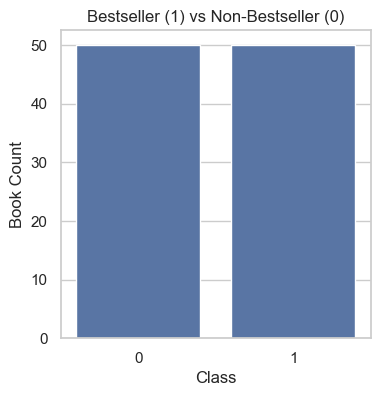

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["is_bestseller"])
plt.title("Bestseller (1) vs Non-Bestseller (0)")
plt.xlabel("Class")
plt.ylabel("Book Count")
plt.show()
